## Report Data Visualization

Data visulize giúp chúng ta có thể giải thích dữ liệu một cách trực quan
Các tài liệu và khóa học đã được tiếp cận.
1. [Google data analysis: Share Data Through the Art of Visualization](https://www.coursera.org/learn/visualize-data)
2. [Visualize dữ liệu bằng matplotlib](https://www.youtube.com/watch?v=Ak7GamuoIr4&t=3280s)
3. [Tiền xử lí dữ liệu với scikit-learn](https://github.com/CodexploreRepo/data-science/blob/main/Pages/A06_SkLearn.md)


**Trong đó ở mục 1:**
- Biết được các loại biểu đồ: bar chart, line chart, pie chart, histogram, scatter plot
- Biết được tình huống nào phù hợp với biểu đồ nào (sẽ được trình bày chi tiết hơn ở phía dưới)
- Static Visualize (tĩnh) và Dynamic Visualize (dữ liệu thay đổi theo thời gian)
- Phân biệt các 2 mối quan hệ tương quan (correlation) và nhân quả (causation)
- Tác động của các chi tiết nhỏ ảnh hưởng đến trực quan hóa:
    * Hình dáng và màu sắc: để có thể thể hiện các sắc thái khác nhau của đặc trưng (lớn bé) (màu càng đậm càng đông dân số, và ngược lại)
    * Space: có khoảng cách hợp lí giữa các cột trong biểu đồ, tránh việc có quá nhiều thông tin.
    * Movement: cho thấy sự thay đổi của dữ liệu, có thể tăng trưởng hoặc xa sút.
    
- Biết được các thành phần trong 1 biểu đồ:
    * Healine: là dòng chữ lớn ở trên hoặc dưới biểu đồ, thể hiện data nào đang được visualize
        > 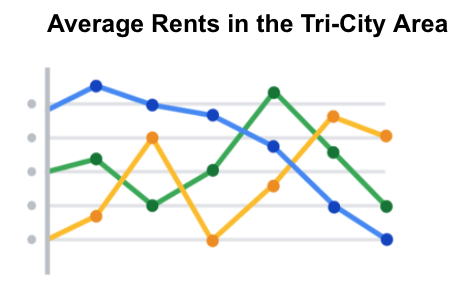
    * Subtitle: hỗ trợ thêm phần ý nghĩa cho Headline (như ở dưới đang cho biết tên của 3 thành phố)
        > 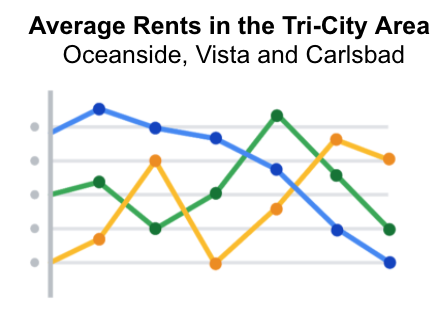
    * Label: identify trục x và trục y đang thể hiện kiểu dữ liệu gì
        > 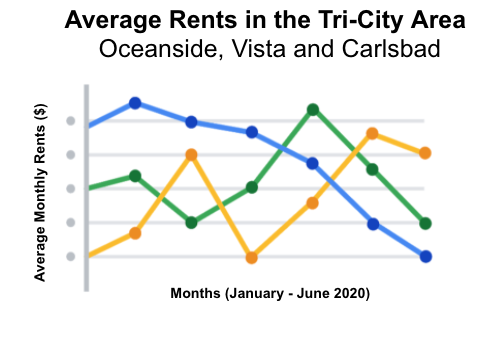
    * Legend: giống như label nhưng lúc này ta gán trực tiếp vào chart
        > 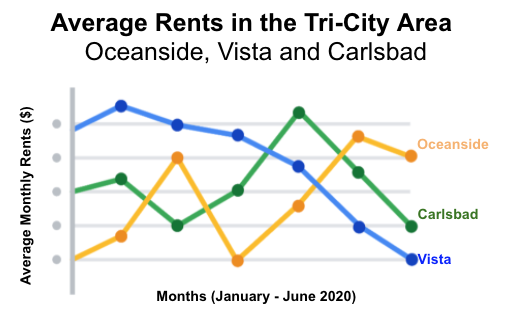
    * Annotations: ghi chú tường minh, mục đích vẫn để người dùng hiểu rõ hơn
        > 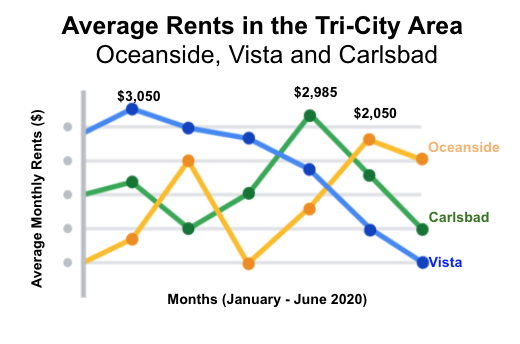

**Mục 2:**
   + Tạo các biểu đồ bằng thư viện matplotlib bằng 2 cách pylot API và OO API (oriented object)
   + Áp dụng các kiến thức đã học từ khóa coursera để tạo được biểu đồ trực quan, dễ nhìn.

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Vẽ biểu đồ bằng pyplot API**
Ta sẽ tiến hành vẽ các biểu đồ liên quan đến [Inflation, Consumer Prices](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?end=2021&locations=VN&start=1996&view=chart)


**Đầu tiên ta sẽ tiến hành đọc file csv, tuy nhiên đây là file chứa tất cả các nước trên thế giới ta chỉ quan tâm đến Việt Nam và tình hình chung của thể giới**

In [243]:
consumer_prices = pd.read_csv('/home/it/Desktop/NTMINH/Test/Data/consumer_prices.csv')
consumer_prices.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN,NaN


In [244]:
# tìm dòng chứa thông tin Việt Nam
row_Vietnam = 0
country_names = consumer_prices['Country Name']
for index, name in enumerate(country_names):
    if name.lower() == 'vietnam':
        row_Vietnam = index
        break
print(row_Vietnam)
consumer_prices_Vietnam =  consumer_prices.iloc[row_Vietnam]
print(consumer_prices_Vietnam)

257
Country Name                                    Vietnam
Country Code                                        VNM
Indicator Name    Inflation, consumer prices (annual %)
Indicator Code                           FP.CPI.TOTL.ZG
1960                                                NaN
                                  ...                  
2018                                           3.539628
2019                                           2.795824
2020                                           3.220934
2021                                           1.834716
Unnamed: 66                                         NaN
Name: 257, Length: 67, dtype: object


In [245]:
# loại trừ những năm không được thu thập
consumer_prices_Vietnam = consumer_prices_Vietnam.dropna()
consumer_prices_Vietnam

Country Name                                    Vietnam
Country Code                                        VNM
Indicator Name    Inflation, consumer prices (annual %)
Indicator Code                           FP.CPI.TOTL.ZG
1996                                              5.675
1997                                           3.209526
1998                                           7.266198
1999                                           4.117102
2000                                          -1.710337
2001                                          -0.431545
2002                                           3.830828
2003                                           3.234648
2004                                           7.754947
2005                                           8.284572
2006                                           7.418017
2007                                           8.344449
2008                                          23.115448
2009                                           6

In [246]:
# Loại 4 dòng đầu để tiến hành vẽ biểu đồ (là những dòng không phải năm)
data = consumer_prices_Vietnam[4:]
data

1996        5.675
1997     3.209526
1998     7.266198
1999     4.117102
2000    -1.710337
2001    -0.431545
2002     3.830828
2003     3.234648
2004     7.754947
2005     8.284572
2006     7.418017
2007     8.344449
2008    23.115448
2009     6.716983
2010     9.207466
2011    18.677732
2012     9.094703
2013     6.592675
2014     4.084554
2015     0.631201
2016     2.668248
2017     3.520257
2018     3.539628
2019     2.795824
2020     3.220934
2021     1.834716
Name: 257, dtype: object

In [247]:
print(list(data.index))

['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [248]:
def find_max_min_local(series, threshold = 6):
    """
        Input: 
            series: list
        Return:
            list of index
    """
    result = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            temp = series[i]*2 - series[i - 1] - series[i + 1]
            if temp > threshold:
                result.append(i)
        elif series[i] < series[i - 1] and series[i] < series[i + 1]: 
            temp = series[i - 1] + series[i + 1] - series[i]*2
            if temp > threshold:
                result.append(i)
    return result


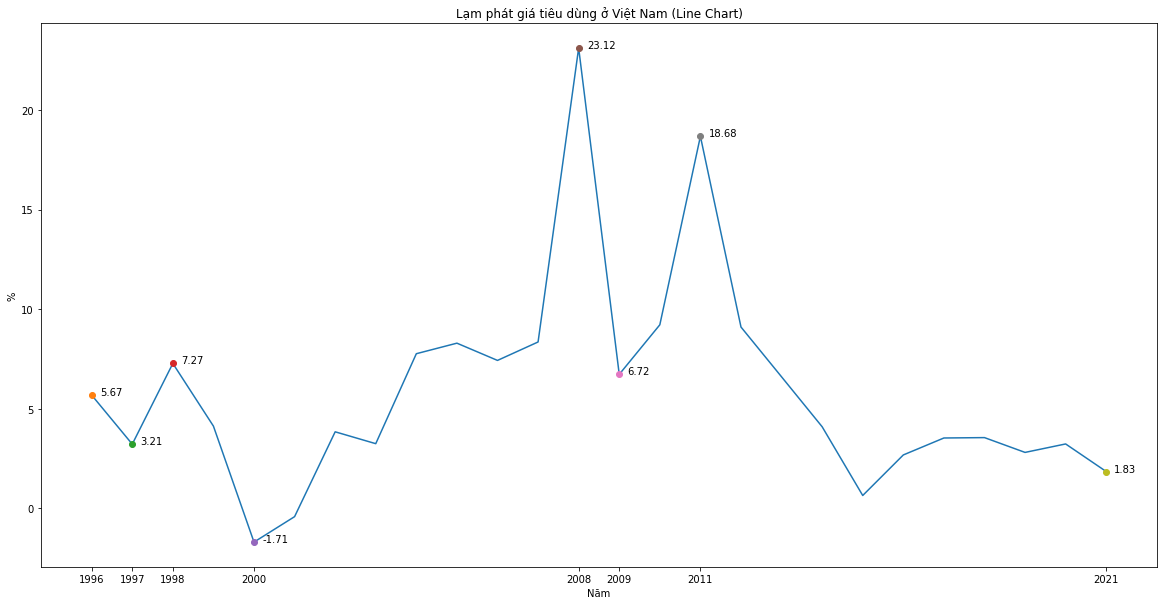

In [249]:
from datetime import datetime, timedelta
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib.ticker as ticker 
fig, ax = plt.subplots()
ax.plot(list(data.index), list(data.values))

# chỉ định trục x hiện như thế nào, cụ thể ta chỉ định những năm
# có biến động lớn như cực đại và cực tiểu
indices = find_max_min_local(data.tolist())
indices = [0] + indices + [len(data.index) - 1]
fig.set_figwidth(20)
fig.set_figheight(10)
ax.set_xticks(indices)

for i in range(len(indices)):
        values = round(data.values[indices[i]], 2)
        ax.plot(indices[i], values, 'o')
        ax.annotate(f"{values}",
                xy=(indices[i], values), xycoords='data',
                xytext= (indices[i] + 0.2, values),
                )

"""arrowprops=dict(facecolor='black', shrink=0.05), 
                horizontalalignment='left',
                verticalalignment='bottom',"""

ax.set(title = 'Lạm phát giá tiêu dùng ở Việt Nam (Line Chart)',
        xlabel = 'Năm',
        ylabel = '%');

**Ta thử vẽ bar chart đối với kiểu dữ liệu này**
- Nhìn chung vẫn có thể thấy được sự thay đổi nhưng lại không miêu tả tốt bằng line.

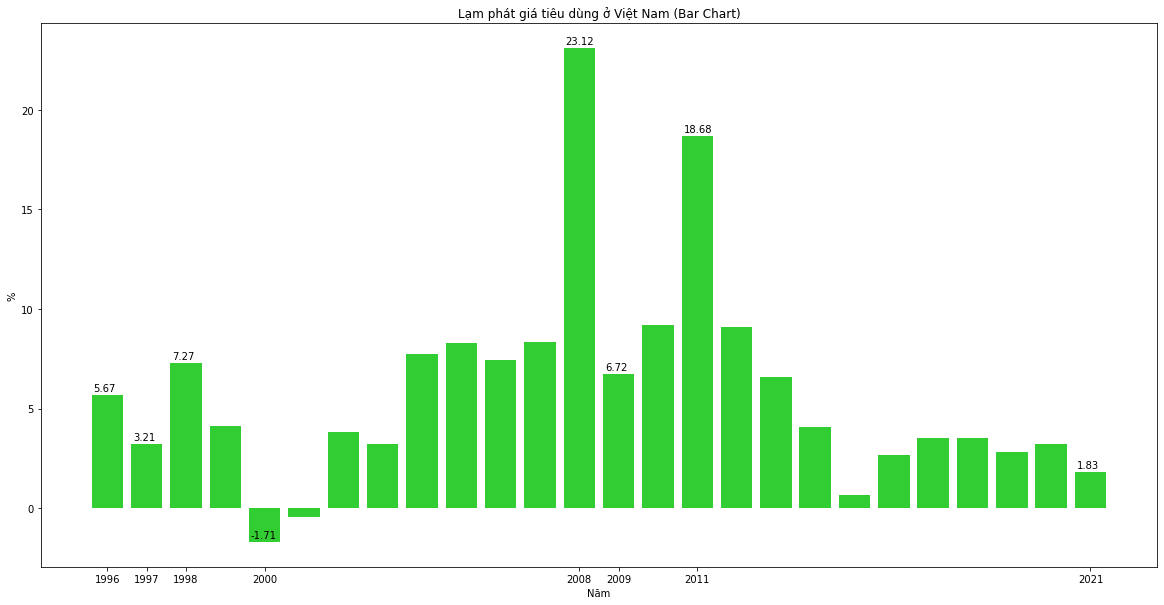

In [250]:
fig, ax = plt.subplots()
ax.bar(list(data.index), list(data.values), color = 'limegreen')
# chỉ định trục x hiện như thế nào, cụ thể ta chỉ định những năm
# có biến động lớn như cực đại và cực tiểu
indices = find_max_min_local(data.tolist())
indices = [0] + indices + [len(data.index) - 1]
fig.set_figwidth(20)
fig.set_figheight(10)
ax.set_xticks(indices)
for i in range(len(indices)):
        values = round(data.values[indices[i]], 2)
        ax.annotate(f"{values}",
                xy=(indices[i], values), xycoords='data',
                xytext= (indices[i] - 0.35, values + 0.2),
                )
ax.set(title = 'Lạm phát giá tiêu dùng ở Việt Nam (Bar Chart)',
        xlabel = 'Năm',
        ylabel = '%');

### Hãy thử so sánh tình hình biến động của thế giới và ở Việt Nam, đồng thời lấy một nước lớn là Mỹ để tham khảo

**Ta áp dụng kiến thức từ [mục 3](https://github.com/CodexploreRepo/data-science/blob/main/Pages/A06_SkLearn.md) tiền xử lí dữ liệu đối với các trường dữ liệu bị NaN**

- Sử dụng class sklearn.compose.ColumnTransformer để thực hiện tranfsorm trên các cột của array hoặc pandas DataFrame
- Sử dụng class sklearn.impute.SimpleImputer để tạo ra một transform giúp thay thế các giá trị missing value bằng các chiến lược đơn giản

In [251]:
# Đầu tiên thực hiện lọc hết các cột không phải giá trị năm

comsumer_prices_world = consumer_prices[consumer_prices.columns[consumer_prices.columns.str.isalnum()]]
comsumer_prices_world

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.476738,1.767324,0.428958,-0.536929,0.273169,1.488234,1.053798,2.675992,0.198228,3.353691
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.885387,10.968442,8.104726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,1.288859,2.102374,1.246285,1.33797,2.534973,4.069029,3.489234,3.538992,1.986136,3.238225,...,5.724658,5.784469,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.575900,6.977676,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316,15.732585,22.021234


In [252]:
"""
# dùng với col:
drop: drop các column được chỉ định

# dùng với row:
loc: dùng như [] trong array vào dataframe dùng label
iloc: dùng như [] trong array  vào dataframe dùng indice
"""

# Lọc bớt những nước (nước) có số  phần tử  NaN > 50%
comsumer_prices_world = comsumer_prices_world.dropna(axis = 0, thresh = 0.5*comsumer_prices_world.shape[1])
comsumer_prices_world


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.611844,3.238108,2.773516,1.814077,2.068840,1.966826,2.458142,1.091848,1.777408,3.243460
13,3.728814,2.287582,-0.319489,0.641026,2.866242,3.405573,3.293413,3.478261,2.521008,3.278689,...,1.762780,2.449889,2.487923,1.508367,1.276991,1.948647,1.911401,1.610768,0.846906,2.863910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.347404,1.458934,0.798864,2.483269,0.842069,3.084526,2.330964,2.762520,5.329351,2.343284
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.725327,2.621050,2.346269,1.434318,1.550016,2.192010,2.438737,2.186902,1.920968,3.423629
260,NaN,NaN,2.654867,0.689655,5.308219,2.113821,2.866242,-0.515996,1.711618,4.130546,...,2.049019,0.610086,-0.406816,0.724470,1.304719,1.749897,4.197459,0.982327,-1.568912,3.133205
263,1.288859,2.102374,1.246285,1.337970,2.534973,4.069029,3.489234,3.538992,1.986136,3.238225,...,5.724658,5.784469,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672


In [253]:
# Sau đó lọc các năm (các cột) có nhiều hơn 50% dữ liệu thiếu
comsumer_prices_world.dropna(axis = 1, thresh = 0.5*comsumer_prices_world.shape[0])

,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.598394,15.224099,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.266667,15.528282,9.669695,...,4.611844,3.238108,2.773516,1.814077,2.068840,1.966826,2.458142,1.091848,1.777408,3.243460
13,3.293413,3.478261,2.521008,3.278689,3.439153,6.138107,6.024096,9.090909,15.416667,15.162455,...,1.762780,2.449889,2.487923,1.508367,1.276991,1.948647,1.911401,1.610768,0.846906,2.863910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.347404,1.458934,0.798864,2.483269,0.842069,3.084526,2.330964,2.762520,5.329351,2.343284
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.725327,2.621050,2.346269,1.434318,1.550016,2.192010,2.438737,2.186902,1.920968,3.423629
260,2.866242,-0.515996,1.711618,4.130546,2.742409,4.766444,7.506824,11.764243,24.987679,8.787742,...,2.049019,0.610086,-0.406816,0.724470,1.304719,1.749897,4.197459,0.982327,-1.568912,3.133205
263,3.489234,3.538992,1.986136,3.238225,4.991877,5.957398,6.425708,9.433987,11.724126,13.425942,...,5.724658,5.784469,6.129838,4.540642,6.571396,5.184247,4.517165,4.120246,3.210036,4.611672


### Sau khi đã tiền xử lí bước đầu, ta bắt đầu qua sử xử lí 'missing value'

In [254]:
from sklearn.impute import SimpleImputer #Help fill the missing values
from sklearn.compose import ColumnTransformer


# fill value mean đối với biến lạm phát tiêu dùng
imp_mean = SimpleImputer(missing_values = np.nan, strategy='mean')

years = comsumer_prices_world.columns

# tạo biến impute để gán tạo transform cho cột trong columns
impute = ColumnTransformer([('year impute', imp_mean, years)])

In [255]:
# thực hiện transform và gán cho filled_consumer_prices
filled_consumer_prices = impute.fit_transform(consumer_prices)

# sau đó convert ngược lại dataframe để vẽ biểu đồ
consumer_prices_dataframe = pd.DataFrame(filled_consumer_prices, 
                                      columns = years)



In [256]:
# tìm mean và độ lệch chuẩn để hiểu chính xác về sự thay đổi tình hình thê giới
consumer_prices_mean = consumer_prices_dataframe.mean(axis = 0)

consumer_prices_std = consumer_prices_dataframe.std(axis = 0)
consumer_prices_std

1960     3.467653
1961     2.333534
1962     7.983005
1963     9.009628
1964     7.459397
          ...    
2017    12.056890
2018     6.865833
2019    16.921191
2020    35.693332
2021    25.907127
Length: 62, dtype: float64

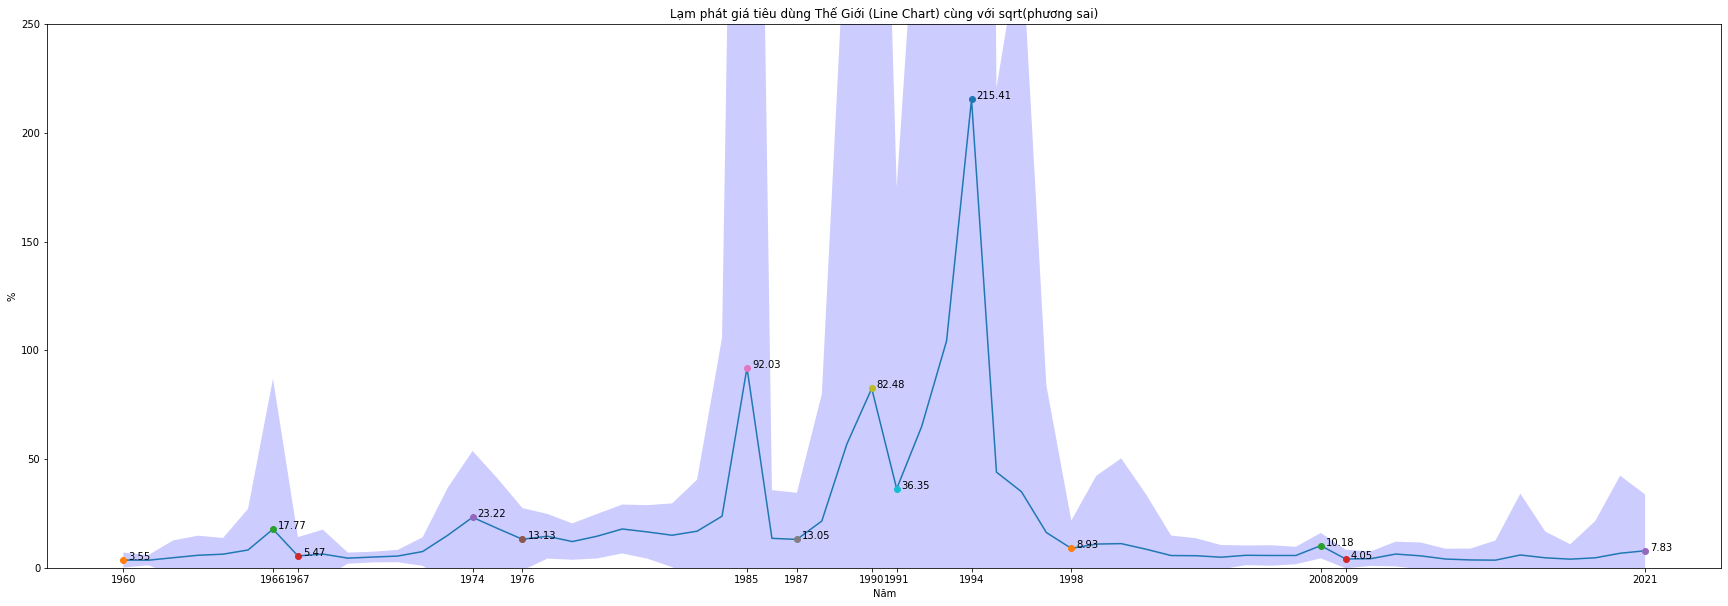

In [275]:
fig, ax = plt.subplots()
ax.plot(list(consumer_prices_mean.index), list(consumer_prices_mean.values))

# chỉ định trục x hiện như thế nào, cụ thể ta chỉ định những năm
# có biến động lớn như cực đại và cực tiểu
indices = find_max_min_local(consumer_prices_mean.tolist())
indices = [0] + indices + [len(consumer_prices_mean.index) - 1]
fig.set_figwidth(30)
fig.set_figheight(10)
ax.set_xticks(indices)
ax.set_ylim(0, 250)

mean = consumer_prices_mean.to_numpy()
std = consumer_prices_std.to_numpy()
ax.fill_between(list(consumer_prices_mean.index), mean + std, mean - std, facecolor='blue', alpha=0.2)

for i in range(len(indices)):
        values = round(consumer_prices_mean.values[indices[i]], 2)
        ax.plot(indices[i], values, 'o')
        ax.annotate(f"{values}",
                xy=(indices[i], values), xycoords='data',
                xytext= (indices[i] + 0.2, values),
                )

"""arrowprops=dict(facecolor='black', shrink=0.05), 
                horizontalalignment='left',
                verticalalignment='bottom',"""

ax.set(title = 'Lạm phát giá tiêu dùng Thế Giới (Line Chart) cùng với độ lệch chuẩn',
        xlabel = 'Năm',
        ylabel = '%');

- Nhìn vào biểu đồ có thể thấy được những điểm cực đại ứng với các thời điểm khủng hoảng kinh tế, khiến cả thể giới rơi vào lạm phát tuy nhiên tùy vào những quốc gia khác nhau sẽ khác nhau nhiều về lạm phát, cụ thể ta sẽ visualize trên bản đồ về phần trăm lạm phát của thế giới bằng scatterplot

In [293]:
locators = pd.read_csv('Data/locator.csv')
locators = locators.iloc[:, 1:]
locators.rename(columns = {'Country' : 'Country Name'})


,Country,Latitude,Longitude
0,Andorra,42.50,1.50
1,United Arab Emirates,24.00,54.00
2,Afghanistan,33.00,65.00
3,Antigua and Barbuda,17.05,-61.80
4,Anguilla,18.25,-63.17


array([1960, 1966, 1967, 1974, 1976, 1985, 1987, 1990, 1991, 1994, 1996,
       1998, 2008, 2009, 2021, 2021])

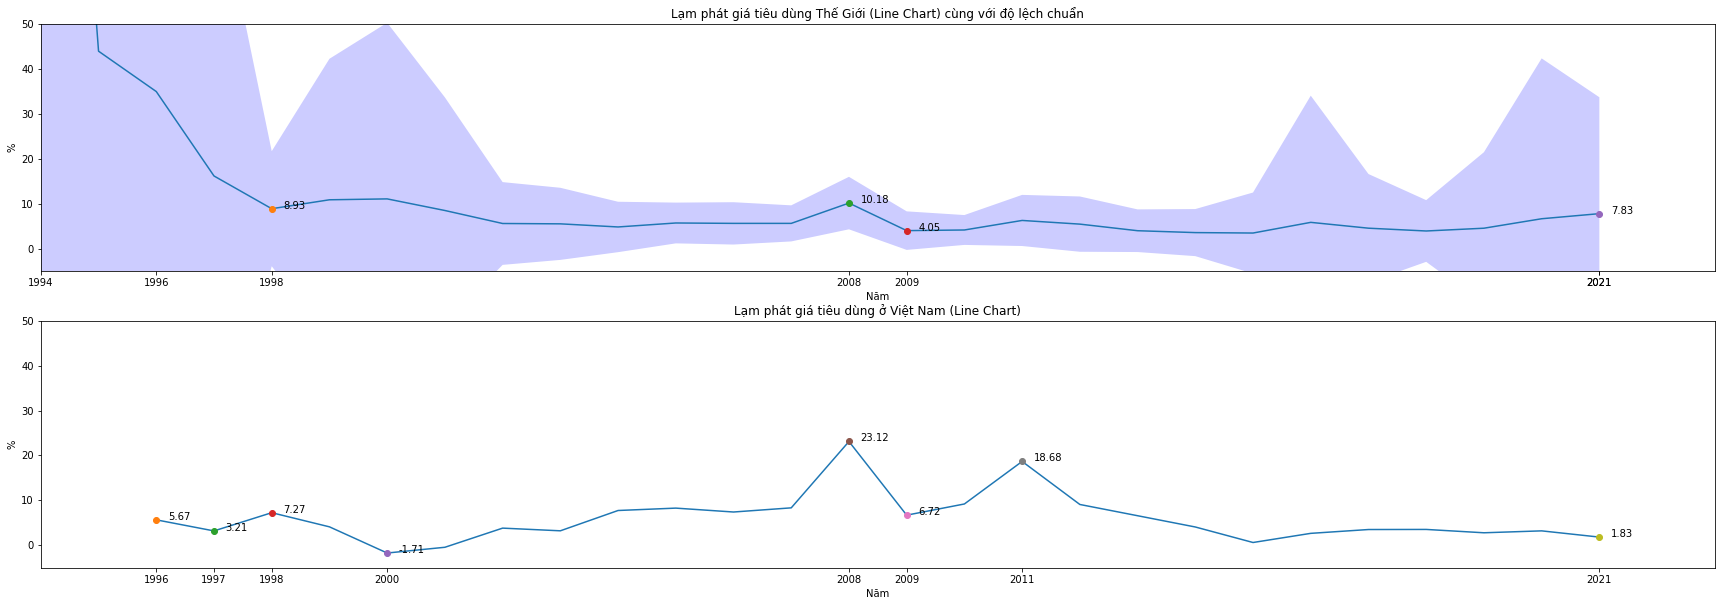

In [280]:
fig, ax = plt.subplots(2, 1)

years = np.asarray(consumer_prices_mean.index.astype(np.int32))

ax[0].plot(years, mean)

# chỉ định trục x hiện như thế nào, cụ thể ta chỉ định những năm
# có biến động lớn như cực đại và cực tiểu
indices = find_max_min_local(consumer_prices_mean.tolist())
indices = [0] + indices + [len(consumer_prices_mean.index) - 1]

fig.set_figwidth(30)
fig.set_figheight(10)


ax[0].fill_between(years, mean + std, mean - std, facecolor='blue', alpha=0.2)

for i in range(len(indices)):
        values = round(consumer_prices_mean.values[indices[i]], 2)
        ax[0].plot(years[indices[i]], values, 'o')
        ax[0].annotate(f"{values}",
                xy=(years[indices[i]], values), xycoords='data',
                xytext= (years[indices[i]] + 0.2, values),
                )

"""arrowprops=dict(facecolor='black', shrink=0.05), 
                horizontalalignment='left',
                verticalalignment='bottom',"""
years = np.append(years[indices],[1996, 2021])
years = np.sort(years)

ax[0].set_xticks(years)

ax[0].set_xlim(1994,2023)
ax[0].set_ylim(-5,50)

ax[0].set(title = 'Lạm phát giá tiêu dùng Thế Giới (Line Chart) cùng với độ lệch chuẩn',
        xlabel = 'Năm',
        ylabel = '%');


years_VN = np.asarray(data.index.astype(np.int32))
ax[1].plot(years_VN, list(data.values))

# chỉ định trục x hiện như thế nào, cụ thể ta chỉ định những năm
# có biến động lớn như cực đại và cực tiểu
indices = find_max_min_local(data.tolist())
indices = [0] + indices + [len(data.index) - 1]

ax[1].set_xticks(years_VN[indices])

ax[1].set_xlim(1994,2023)
ax[1].set_ylim(-5,50)

for i in range(len(indices)):
        values = round(data.values[indices[i]], 2)
        ax[1].plot(years_VN[indices[i]], values, 'o')
        ax[1].annotate(f"{values}",
                xy=(years_VN[indices[i]], values), xycoords='data',
                xytext= (years_VN[indices[i]] + 0.2, values),
                )

"""arrowprops=dict(facecolor='black', shrink=0.05), 
                horizontalalignment='left',
                verticalalignment='bottom',"""

ax[1].set(title = 'Lạm phát giá tiêu dùng ở Việt Nam (Line Chart)',
        xlabel = 'Năm',
        ylabel = '%');
years